# Auswahl der Niederschalgsereignisse in 2014 bis 2024 
Author: Flemming Albers

## Datenimport

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os

# Set relevant data paths
events_path = '02_input_data\\events_FMO.csv'
P_path = '02_input_data\\P_FMO.csv'
save_folder = '02_input_data\\events_FMO'

# Read in data
P_events = pd.read_csv(events_path)
P_series = pd.read_csv(P_path)

# Order data in P_events by hN_mm
P_events_sort = P_events.sort_values('hN_mm')

# reset index of P_events_sort
P_events_sort = P_events_sort.reset_index(drop=True)
P_events_sort['iN_max_60'] = P_events_sort['iN_max']*12

P_events_sort = P_events_sort[P_events_sort['hN_mm'] >= 1]

## Übersicht des Datensatzes der Niederschlagsereignisse

In [4]:
# P_events_sort
len(P_events_sort[P_events_sort['hN_mm'] >= 1])


1255

## Darstellung und Auswahl

Anzahl ausgewählter Ereignisse: 100
Davon auserhalb des Rasters: 43
Davon je Rasterzelle
+----+----+
| 14 | 14 |
+----+----+
| 14 | 15 |
+----+----+


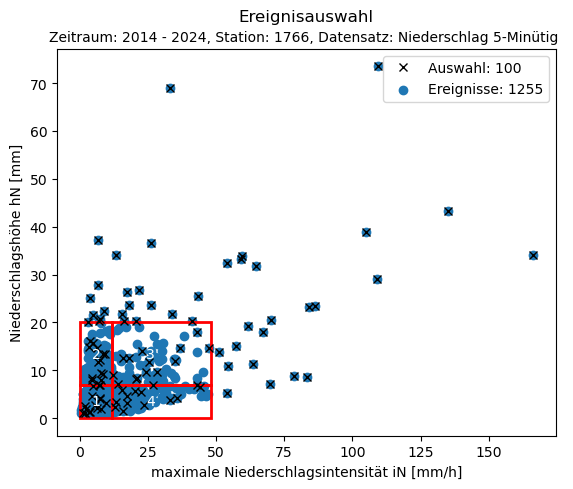

In [5]:
from tabulate import tabulate
P_20_4 = P_events_sort[(P_events_sort['hN_mm'] > 20) | (P_events_sort['iN_max_60'] > 4*12)]

n_events = [14,14,14,15]
h = [0, 7, 20]
iN = [0, 12, 48]
rs = 6

i = 0
j = 0
P_sample = pd.DataFrame()

for k in range(len(n_events)):

    selected_events = P_events_sort[(P_events_sort['iN_max_60'] >= iN[i]) & (P_events_sort['iN_max_60'] < iN[i+1]) & (P_events_sort['hN_mm'] >= h[j]) & (P_events_sort['hN_mm'] < h[j+1])]
    P_sample = pd.concat([P_sample, selected_events.sample(n_events[k-1], random_state=rs)])

    if k == 0:
        j += 1
    if k == 1:
        i += 1
    if k == 2:
        j -= 1

P_sample = pd.concat([P_sample, P_20_4])

# Plot hN_max_60 vs hN_mm with different symbols
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(P_sample['iN_max_60'], P_sample['hN_mm'], 'x', color='black', label='Sample')
ax.scatter(P_events_sort['iN_max_60'], P_events_sort['hN_mm'], marker='o',  label='Events')

ax.set_xlabel('maximale Niederschlagsintensität iN [mm/h]')
ax.set_ylabel('Niederschlagshöhe hN [mm]')
ax.set_title('Ereignisauswahl', pad=20)
ax.text(0.5, 1.03, 'Zeitraum: 2014 - 2024, Station: 1766, Datensatz: Niederschlag 5-Minütig ', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend(labels=['Auswahl: {}'.format(len(P_sample)), 'Ereignisse: {}'.format(len(P_events_sort))])
ax.add_patch(Rectangle((iN[0], iN[0]), iN[1], h[1], edgecolor='red', facecolor='none', lw=2))
ax.text(6, 3.5, '1', ha='center', va='center', color='white')
ax.add_patch(Rectangle((iN[0], h[1]), iN[1], h[2]-h[1], edgecolor='red', facecolor='none', lw=2))
ax.text(6, 13.5, '2', ha='center', va='center', color='white')
ax.add_patch(Rectangle((iN[1], h[1]), iN[2]-iN[1], h[2]-h[1], edgecolor='red', facecolor='none', lw=2))
ax.text(26, 13.5, '3', ha='center', va='center', color='white')
ax.add_patch(Rectangle((iN[1], h[0]), iN[2]-iN[1], h[1], edgecolor='red', facecolor='none', lw=2))
ax.text(26, 3.55, '4', ha='center', va='center', color='white')
plt.tight_layout()
print("Anzahl ausgewählter Ereignisse:", len(P_sample))

print("Davon auserhalb des Rasters:", len(P_20_4))

print("Davon je Rasterzelle")
table_data = [[14, 14], [14, 15]]

print(tabulate(table_data, tablefmt='grid'))

plt.show()


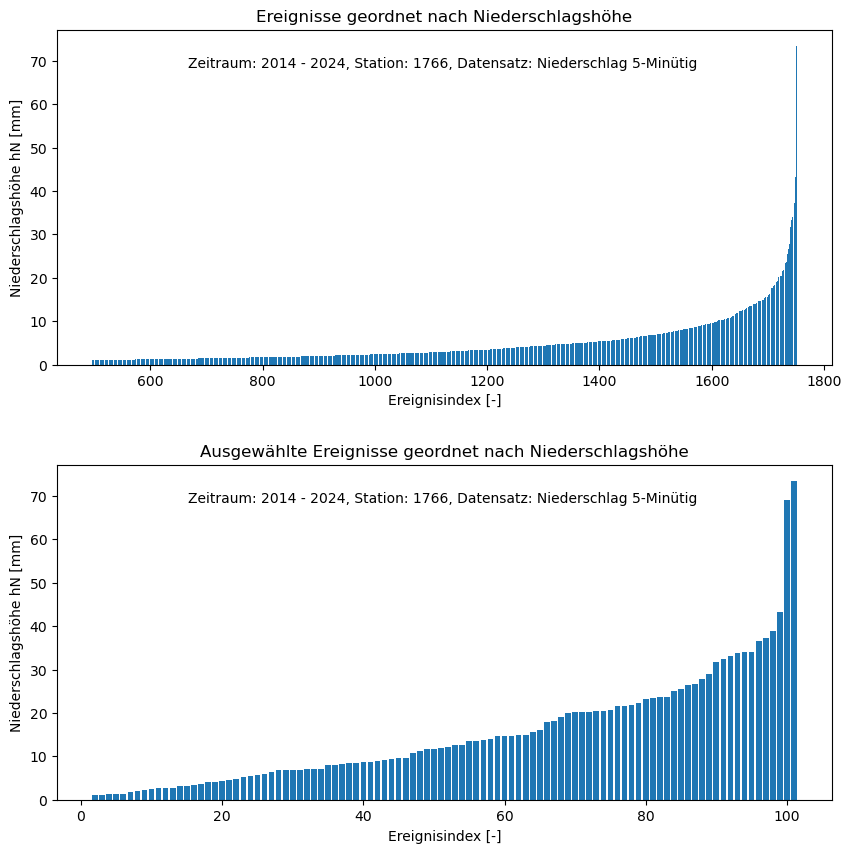

In [6]:
P_sample = P_sample.sort_values('hN_mm').reset_index(drop=True)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

xlabel = 'Ereignisindex [-]'
ylabel = 'Niederschlagshöhe hN [mm]'

plt.subplots_adjust(hspace=0.3)
axes[0].bar(P_events_sort.index, P_events_sort['hN_mm'])
axes[0].set_xlabel(xlabel)  # Add this line to label the x-axis
axes[0].set_ylabel(ylabel)
axes[0].set_title('Ereignisse geordnet nach Niederschlagshöhe')
axes[0].text(0.5, 0.9, 'Zeitraum: 2014 - 2024, Station: 1766, Datensatz: Niederschlag 5-Minütig ', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)

axes[1].bar(P_sample.index + 2, P_sample['hN_mm'])
axes[1].set_xlabel(xlabel)  # Add this line to label the x-axis
axes[1].set_ylabel(ylabel)
axes[1].set_title('Ausgewählte Ereignisse geordnet nach Niederschlagshöhe')
axes[1].text(0.5, -0.4, 'Zeitraum: 2014 - 2024, Station: 1766, Datensatz: Niederschlag 5-Minütig ', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)

plt.show()
# P_sample[P_sample['hN_mm'] < 2]

## Extrahieren der Eventdaten

In [29]:
from moduels.extract_events import extract_events
extract_events(P_sample, P_series, save_folder)


Event 2016-04-03 22:05:00 saved to events_FMO\2016-04-03 22 05 00_hN0.07.csv
Event 2019-03-18 11:00:00 saved to events_FMO\2019-03-18 11 00 00_hN0.37.csv
Event 2020-02-26 13:20:00 saved to events_FMO\2020-02-26 13 20 00_hN0.41.csv
Event 2016-12-13 10:25:00 saved to events_FMO\2016-12-13 10 25 00_hN0.45.csv
Event 2017-05-18 12:55:00 saved to events_FMO\2017-05-18 12 55 00_hN0.61.csv
Event 2015-05-20 13:55:00 saved to events_FMO\2015-05-20 13 55 00_hN0.88.csv
Event 2015-03-03 23:05:00 saved to events_FMO\2015-03-03 23 05 00_hN1.01.csv
Event 2020-05-23 11:30:00 saved to events_FMO\2020-05-23 11 30 00_hN1.42.csv
Event 2014-02-01 07:20:00 saved to events_FMO\2014-02-01 07 20 00_hN1.56.csv
Event 2021-03-15 10:50:00 saved to events_FMO\2021-03-15 10 50 00_hN1.59.csv
Event 2019-01-07 07:10:00 saved to events_FMO\2019-01-07 07 10 00_hN1.84.csv
Event 2016-01-14 11:20:00 saved to events_FMO\2016-01-14 11 20 00_hN1.96.csv
Event 2015-05-19 13:20:00 saved to events_FMO\2015-05-19 13 20 00_hN2.36.csv

In [30]:
print("Maximale Ereignisdauer: ", round(P_sample["DN_h"].max(),2), " h")

Maximale Ereignisdauer:  39.92  h
